In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/IBM_DATA

/content/drive/MyDrive/Colab Notebooks/IBM_DATA


In [5]:
df_AMM_JJASOM_mean = pd.read_table('AMM_JJASOM_mean_1950-2020.dat', sep="\s+", header=None)
df_AMM_JJASOM_mean = df_AMM_JJASOM_mean.rename(columns={0: "Year", 1:"AMM_JJASOM_mean"}).copy()
df_ERSSTv5_ASO_MDRRelative = pd.read_table('ERSSTv5_ASO_MDRRelative_SST_1870-2020.dat', sep="\s+", header=None)
df_ERSSTv5_ASO_MDR = pd.read_table('ERSSTv5_ASO_MDR_SST_1870-2020.dat', sep="\s+", header=None)
df_ERSSTv5_ASO_MDR_anomalies = pd.read_table('ERSSTv5_ASO_MDR_SST_anomalies_1870-2020.dat', sep="\s+", header=None)
df_ERSSTv5_ASO_MDR_tropics = pd.read_table('ERSSTv5_ASO_tropics_SST_1870-2020.dat', sep="\s+", header=None)
df_ERSSTv5_ASO_MDR_tropics_anomalies = pd.read_table('ERSSTv5_ASO_tropics_SST_anomalies_1870-2020.dat', sep="\s+", header=None)
df_HURDAT_TCCounts = pd.read_table('HURDAT_TCCounts_1870-2020.dat', sep="\s+", header=None)
df_NAO_DJFM_mean = pd.read_table('NAO_DJFM_mean_1870-2020.dat', sep="\s+", header=None)
df_NAO_MJ_mean = pd.read_table('NAO_MJ_mean_1870-2020.dat', sep="\s+", header=None)
df_Nino12_DJF = pd.read_table('Nino12_DJF_1870-2020.dat', sep="\s+", header=None)
df_Nino34_DJF = pd.read_table('Nino34_DJF_1870-2020.dat', sep="\s+", header=None)
df_Nino3_DJF = pd.read_table('Nino3_DJF_1870-2020.dat', sep="\s+", header=None)
df_SahelPrecipIndex_JJAS_mean = pd.read_table('SahelPrecipIndex_JJAS_mean_1901-2017.dat', sep="\s+", header=None)
df_SahelPrecipIndex_JJAS_mean = df_SahelPrecipIndex_JJAS_mean.rename(columns={0: "Year", 1:"SahelPrecipIndex_JJAS_mean"}).copy()
df_VK08_TCCount = pd.read_table('VK08_TCCounts_1878-2020.dat', sep="\s+", header=None)
df_VK08_TCCount = df_VK08_TCCount.rename(columns={0: "Year", 1:"VK08_TCCount"}).copy()
df_hurricanefinal = pd.DataFrame()
df_hurricanefinal['Year'] = df_HURDAT_TCCounts[0]
df_hurricanefinal['HURRICANE_COUNT'] = df_HURDAT_TCCounts[1]

df_hurricanefinal['ERSSTv5_ASO_MDRRelative'] = df_ERSSTv5_ASO_MDRRelative[0]
df_hurricanefinal['ERSSTv5_ASO_MDR'] = df_ERSSTv5_ASO_MDR[0] 
df_hurricanefinal['ERSSTv5_ASO_MDR_anomalies'] = df_ERSSTv5_ASO_MDR_anomalies[0] 
df_hurricanefinal['ERSSTv5_ASO_MDR_tropics'] = df_ERSSTv5_ASO_MDR_tropics[0] 
df_hurricanefinal['ERSSTv5_ASO_MDR_tropics_anomalies'] = df_ERSSTv5_ASO_MDR_tropics_anomalies[0] 
df_hurricanefinal['ERSSTv5_ASO_MDR'] = df_ERSSTv5_ASO_MDR[0] 

df_hurricanefinal['NAO_DJFM_mean'] = df_NAO_DJFM_mean[1]
df_hurricanefinal['NAO_MJ_mean'] = df_NAO_MJ_mean[1] 

df_hurricanefinal['Nino12_DJF'] = df_Nino12_DJF[1]
df_hurricanefinal['Nino34_DJF'] = df_Nino34_DJF[1] 
df_hurricanefinal['Nino3_DJF'] = df_Nino3_DJF[1]

df_hurricanefinal = pd.merge(df_hurricanefinal, df_AMM_JJASOM_mean,how = "left", on=['Year'])
df_hurricanefinal = pd.merge(df_hurricanefinal, df_VK08_TCCount,how = "left", on=['Year'])
df_hurricanefinal = pd.merge(df_hurricanefinal, df_SahelPrecipIndex_JJAS_mean,how = "left", on=['Year'])

In [6]:
df_hurricanefinal

,Year,HURRICANE_COUNT,ERSSTv5_ASO_MDRRelative,ERSSTv5_ASO_MDR,ERSSTv5_ASO_MDR_anomalies,ERSSTv5_ASO_MDR_tropics,ERSSTv5_ASO_MDR_tropics_anomalies,NAO_DJFM_mean,NAO_MJ_mean,Nino12_DJF,Nino34_DJF,Nino3_DJF,AMM_JJASOM_mean,VK08_TCCount,SahelPrecipIndex_JJAS_mean
0,1870,11,0.239469,27.65656,-0.233739,25.89209,-0.473208,0.00275,1.0530,-0.850000,-0.540000,-0.573333,NaN,NaN,NaN
1,1871,8,-0.396031,27.01905,-0.871247,25.89008,-0.475217,0.05475,-1.9325,-1.156667,-0.640000,-0.710000,NaN,NaN,NaN
2,1872,5,-0.743195,26.62783,-1.262471,25.84602,-0.519276,0.24850,-0.1640,-1.003333,-0.890000,-1.046667,NaN,NaN,NaN
3,1873,5,-0.021984,27.38899,-0.501313,25.88597,-0.479329,1.77750,-0.0725,-1.156667,-0.896667,-1.276667,NaN,NaN,NaN
4,1874,7,0.161659,27.44587,-0.444434,25.75921,-0.606093,-0.53575,-1.3055,-0.676667,-0.740000,-0.793333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2016,15,0.082054,28.36498,0.474681,26.75793,0.392627,1.17500,-1.0485,0.423333,-0.286667,-0.056667,1.530000,15.0,2.5250
147,2017,17,0.221386,28.43985,0.549548,26.69346,0.328162,0.39925,-0.0835,-1.073333,-0.813333,-1.010000,2.618333,17.0,1.2625
148,2018,15,-0.232869,27.93210,0.041802,26.63997,0.274671,1.46525,0.3060,0.706667,0.700000,0.720000,-2.171667,15.0,NaN
149,2019,18,-0.098519,28.12645,0.236148,26.69997,0.334666,2.22850,-0.3895,-0.113333,0.543333,0.273333,0.566667,18.0,NaN


In [7]:
df_hurricanefinalVK08Counts = df_hurricanefinal.dropna(subset=['VK08_TCCount'])
test2005 = df_hurricanefinalVK08Counts.loc[df_hurricanefinalVK08Counts.Year == 2005].drop(columns=['HURRICANE_COUNT',"VK08_TCCount", 'Year'],axis=1)
test2020 = df_hurricanefinalVK08Counts.loc[df_hurricanefinalVK08Counts.Year == 2020].drop(columns=['HURRICANE_COUNT',"VK08_TCCount", 'Year'],axis=1)
test1999 = df_hurricanefinalVK08Counts.loc[df_hurricanefinalVK08Counts.Year == 1999].drop(columns=['HURRICANE_COUNT',"VK08_TCCount", 'Year'],axis=1)

In [8]:
# df_hurricanefinal1 = df_hurricanefinalVK08Counts.loc[df_hurricanefinal.Year != 2005]
# df_hurricanefinal1 = df_hurricanefinal1.loc[df_hurricanefinal.Year != 2020]

In [9]:
df_hurricanefinal1 = df_hurricanefinalVK08Counts

In [10]:
X = df_hurricanefinal1.drop(columns=['HURRICANE_COUNT',"VK08_TCCount", 'Year'],axis=1)
y = df_hurricanefinal1['VK08_TCCount']

In [11]:
df_hurricanefinal1

,Year,HURRICANE_COUNT,ERSSTv5_ASO_MDRRelative,ERSSTv5_ASO_MDR,ERSSTv5_ASO_MDR_anomalies,ERSSTv5_ASO_MDR_tropics,ERSSTv5_ASO_MDR_tropics_anomalies,NAO_DJFM_mean,NAO_MJ_mean,Nino12_DJF,Nino34_DJF,Nino3_DJF,AMM_JJASOM_mean,VK08_TCCount,SahelPrecipIndex_JJAS_mean
8,1878,12,0.782837,28.55411,0.663813,26.24628,-0.119023,-0.81125,-0.6320,-0.373333,-0.493333,-0.540000,NaN,15.370,NaN
9,1879,8,0.591066,28.04251,0.152207,25.92644,-0.438859,0.74400,0.0680,-0.133333,-0.916667,-0.873333,NaN,11.308,NaN
10,1880,11,0.067194,27.45252,-0.437781,25.86032,-0.504975,-1.30050,-0.6660,-0.103333,0.233333,0.040000,NaN,14.084,NaN
11,1881,7,0.286079,27.76526,-0.125039,25.95418,-0.411118,3.16025,0.4140,-0.673333,-0.456667,-0.613333,NaN,10.234,NaN
12,1882,6,0.081678,27.46557,-0.424733,25.85889,-0.506411,0.29575,-0.6590,-1.133333,-0.566667,-0.766667,NaN,9.183,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2016,15,0.082054,28.36498,0.474681,26.75793,0.392627,1.17500,-1.0485,0.423333,-0.286667,-0.056667,1.530000,15.000,2.5250
147,2017,17,0.221386,28.43985,0.549548,26.69346,0.328162,0.39925,-0.0835,-1.073333,-0.813333,-1.010000,2.618333,17.000,1.2625
148,2018,15,-0.232869,27.93210,0.041802,26.63997,0.274671,1.46525,0.3060,0.706667,0.700000,0.720000,-2.171667,15.000,NaN
149,2019,18,-0.098519,28.12645,0.236148,26.69997,0.334666,2.22850,-0.3895,-0.113333,0.543333,0.273333,0.566667,18.000,NaN


In [12]:
#check NA
X.isna().sum()

ERSSTv5_ASO_MDRRelative               0
ERSSTv5_ASO_MDR                       0
ERSSTv5_ASO_MDR_anomalies             0
ERSSTv5_ASO_MDR_tropics               0
ERSSTv5_ASO_MDR_tropics_anomalies     0
NAO_DJFM_mean                         0
NAO_MJ_mean                           0
Nino12_DJF                            0
Nino34_DJF                            0
Nino3_DJF                             0
AMM_JJASOM_mean                      72
SahelPrecipIndex_JJAS_mean           26
dtype: int64

In [13]:
y

8      15.370
9      11.308
10     14.084
11     10.234
12      9.183
        ...  
146    15.000
147    17.000
148    15.000
149    18.000
150    30.000
Name: VK08_TCCount, Length: 143, dtype: float64

In [14]:
import matplotlib
import matplotlib.pyplot as plt

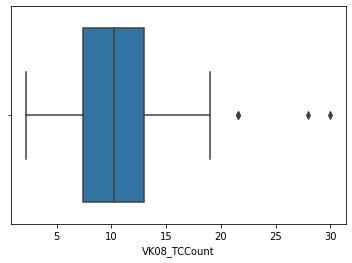

In [15]:
import seaborn as sns
sns.boxplot(x=df_hurricanefinal1['VK08_TCCount'])

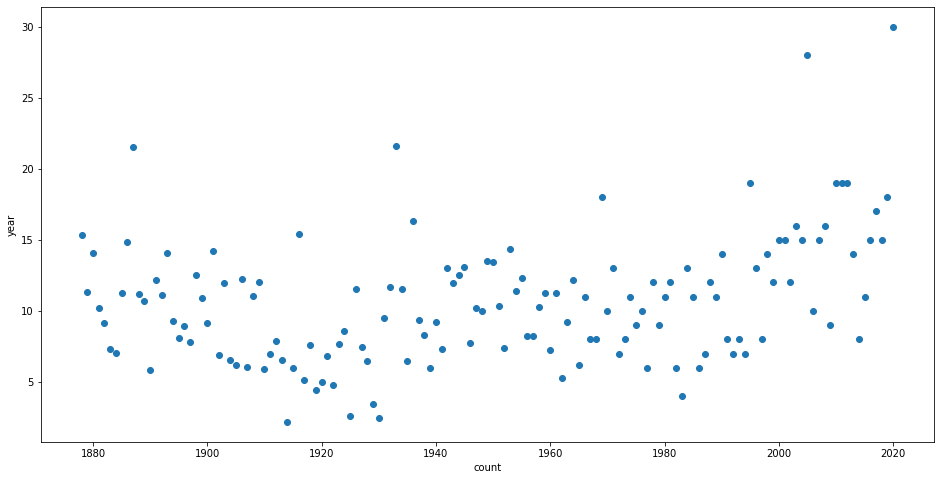

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_hurricanefinal1['Year'],df_hurricanefinal1['VK08_TCCount'])
ax.set_xlabel('count')
ax.set_ylabel('year')
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [44]:
clusters=remove_outliers_DBSCAN((df_hurricanefinal1['VK08_TCCount']),1,3)
clusters.value_counts().sort_values(ascending=False)

 0    139
-1      4
Name: cluster, dtype: int64

In [45]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([9, 55, 127, 142], dtype='int64')

In [46]:
df_hurricanefinal1[['Year','VK08_TCCount']].iloc[ind_outlier]

,Year,VK08_TCCount
17,1887,21.521
63,1933,21.572
135,2005,28.000
150,2020,30.000


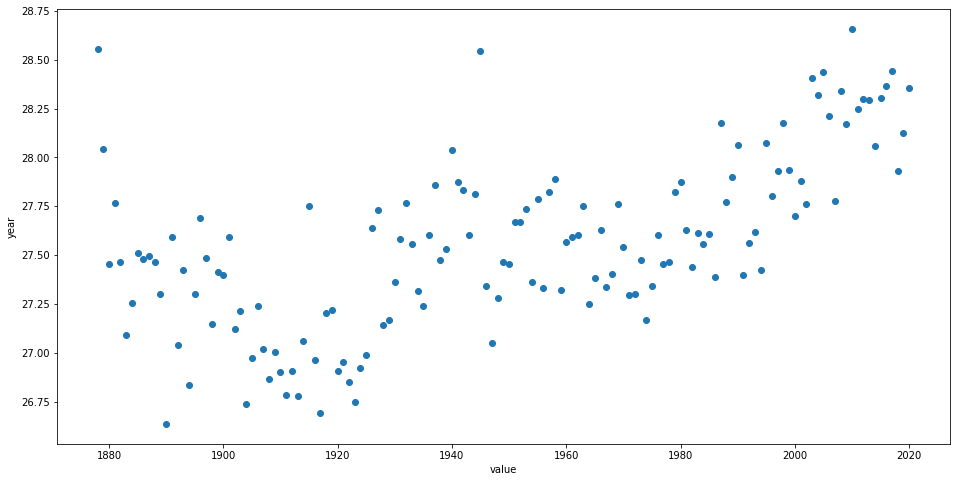

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_hurricanefinal1['Year'],df_hurricanefinal1['ERSSTv5_ASO_MDR'])
ax.set_xlabel('value')
ax.set_ylabel('year')
plt.show()

In [22]:
clusters=remove_outliers_DBSCAN((df_hurricanefinal1['ERSSTv5_ASO_MDR']),0.1,3)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([0, 67, 132], dtype='int64')

In [23]:
df_hurricanefinal1[['Year','ERSSTv5_ASO_MDR']].iloc[ind_outlier]

,Year,ERSSTv5_ASO_MDR
8,1878,28.55411
75,1945,28.54538
140,2010,28.65902


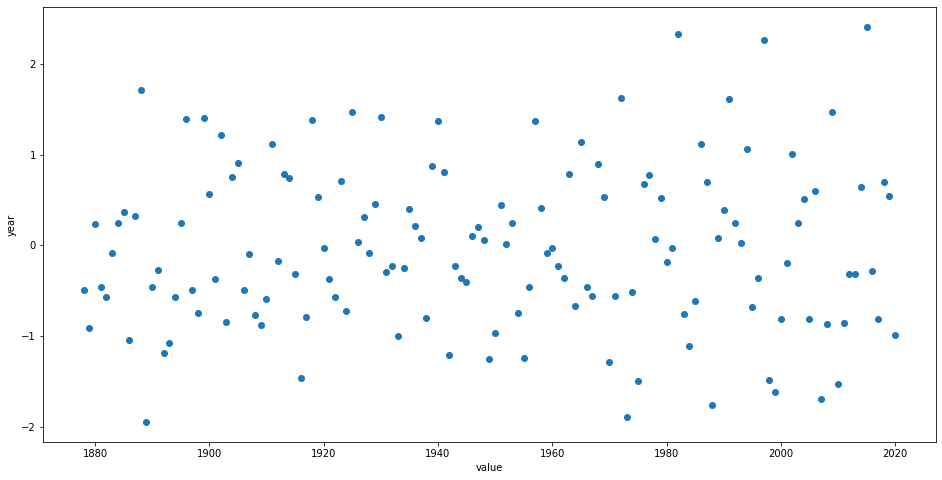

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_hurricanefinal1['Year'],df_hurricanefinal1['Nino34_DJF'])
ax.set_xlabel('value')
ax.set_ylabel('year')
plt.show()

In [25]:
clusters=remove_outliers_DBSCAN((df_hurricanefinal1['Nino34_DJF']),0.1,3)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([11, 95], dtype='int64')

In [26]:
df_hurricanefinal1[['Year','Nino34_DJF']].iloc[ind_outlier]

,Year,Nino34_DJF
19,1889,-1.95
103,1973,-1.90


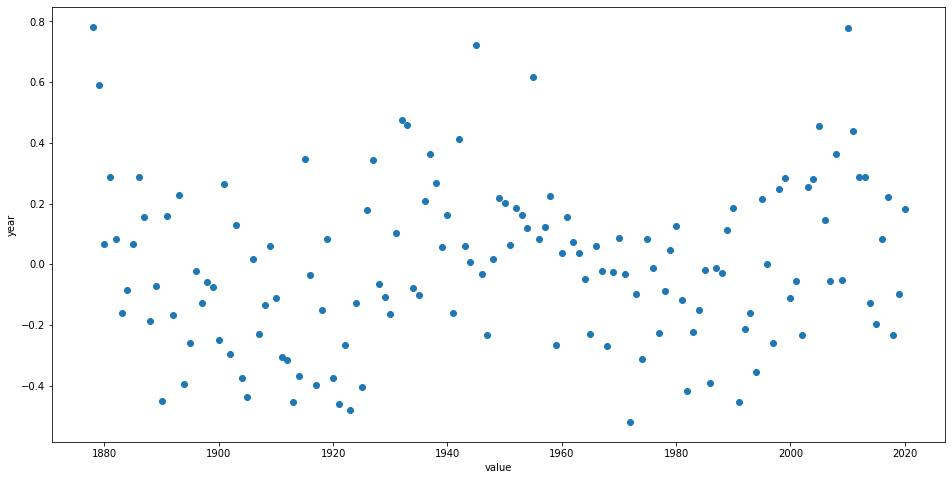

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_hurricanefinal1['Year'],df_hurricanefinal1['ERSSTv5_ASO_MDRRelative'])
ax.set_xlabel('value')
ax.set_ylabel('year')
plt.show()

In [28]:
clusters=remove_outliers_DBSCAN((df_hurricanefinal1['ERSSTv5_ASO_MDRRelative']),0.1,3)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([1, 77], dtype='int64')

In [29]:
df_hurricanefinal1[['Year','ERSSTv5_ASO_MDRRelative']].iloc[ind_outlier]

,Year,ERSSTv5_ASO_MDRRelative
9,1879,0.591066
85,1955,0.616409


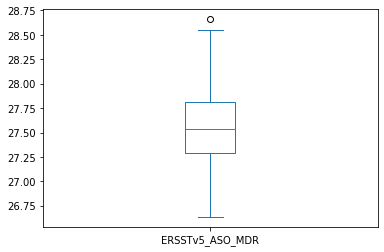

In [30]:
df_hurricanefinal1['ERSSTv5_ASO_MDR'].plot(kind = 'box')

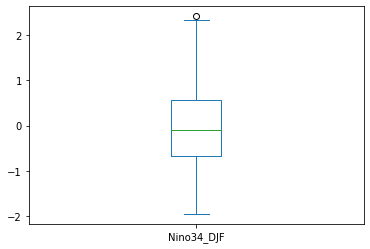

In [31]:
df_hurricanefinal1['Nino34_DJF'].plot(kind = 'box')

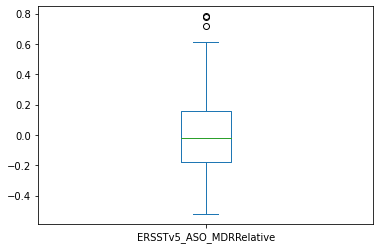

In [32]:
df_hurricanefinal1['ERSSTv5_ASO_MDRRelative'].plot(kind = 'box')